# Aulas 02 - Matplotlib

O matplotlib é uma biblioteca que permite graficar diversos tipos de representações diretamente a partir de arrays. Possui essencialmente todos os tipos de gráficos que estudamos na aula passada, mas com uma sintaxe diferente a do pandas, o que afetará não somente como plotamos as visualizações, mas, também, elementos "estéticos" associados a elas (como legendas, eixos e afins). 

A biblioteca do matplotlib define alguns **elementos básicos** a partir dos quais se estruturam todas as suas funções.

### Elementos básicos de uma figura com matplotlib

[Guia oficial do matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Na figura abaixo, temos definidos os **elementos básicos** mencionados acima. Eles servirão como parâmetros nas mais variadas funções da biblioteca.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="600"/>

É essencial que entendamos três outros elementos fundamentais para a melhor utilização da biblioteca matplotlib:

**-Figure:** é a imagem como um todo; a "figura" prorpiamente dita.

**-Axes:** contém todos os elementos do plot em si, incluindo os eixos, mas não apenas eles.

**-Axis:** são os eixos do gráfico (eixo-x; eixo-y; eixo-z).

## Exemplos de algumas visualizações

In [18]:
import pandas as pd

Vamos utilizar, como exemplo, um [dataset de vendas do Walmart](https://www.kaggle.com/datasets/naveenkumar20bps1137/walmart-sales-analysis).

In [19]:
df = pd.read_csv("Walmart.csv")

In [20]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [21]:
df.shape

(3203, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


[Gráfico de linhas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Vamos avaliar o número total de pedidos ao longo do tempo?

In [23]:
# Convertendo a data para datetime
df['date'] = pd.to_datetime(df['Order Date'])

C:\Users\Profº Fernando\AppData\Local\Temp\ipykernel_8728\515656660.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['Order Date'])


In [24]:
df[['Order Date', 'date']]

,Order Date,date
0,13-06-2013,2013-06-13
1,09-06-2011,2011-09-06
2,09-06-2011,2011-09-06
3,09-06-2011,2011-09-06
4,09-06-2011,2011-09-06
...,...,...
3198,30-09-2013,2013-09-30
3199,27-02-2014,2014-02-27
3200,27-02-2014,2014-02-27
3201,27-02-2014,2014-02-27


Como seria o plot com pandas?

In [25]:
df.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06


<Axes: xlabel='date'>

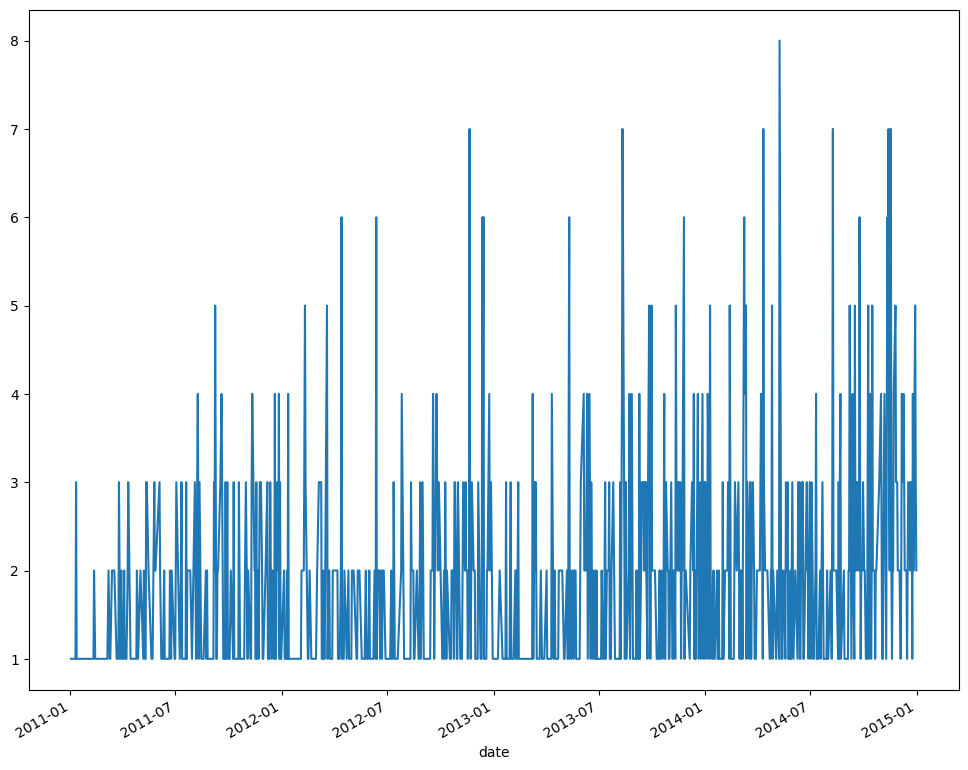

In [26]:
df.groupby("date")['Order ID'].nunique().plot(figsize = (12,10))

E os produtos por data?

<Axes: xlabel='date'>

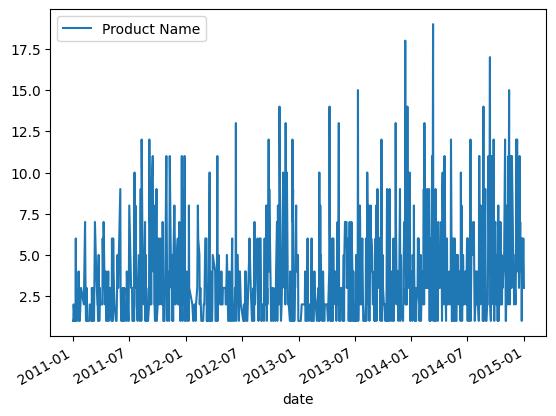

In [27]:
df.groupby("date")[['Product Name']].count().plot()

Como faríamos com o matplotlib?

In [28]:
import matplotlib.pyplot as plt

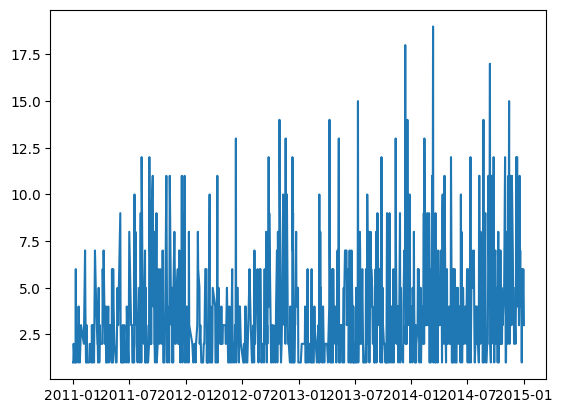

In [29]:
plt.plot(df.groupby("date")[['Product Name']].count())

O pacote já "entende" o que estamos tentando fazer se passarmos puramente o dataframe agrupado, mas também podemos querer especificar cada parâmetro separadamente.

In [30]:
df_grouped = df.groupby("date")[['Product Name']].count()
df_grouped

,Product Name
date,
2011-01-02,1
2011-01-03,1
2011-01-04,2
2011-01-07,1
2011-01-08,1
...,...
2014-12-25,6
2014-12-26,3
2014-12-29,6


In [31]:
x = list(df_grouped.index)
y = df_grouped.values

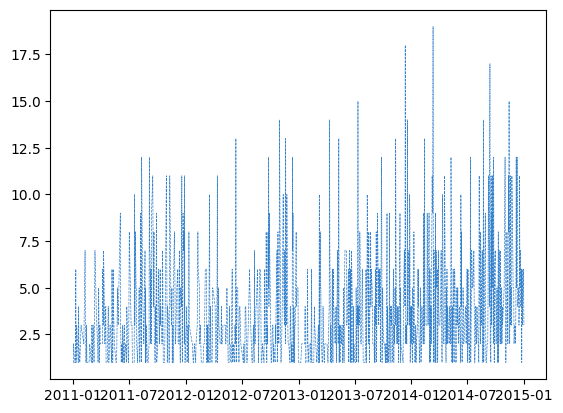

In [32]:
plt.plot(x,y, c = (0.2,0.5,0.8), linestyle = '--', linewidth = 0.5, markersize = 5)

Quais as principais diferenças no plot com os dois pacotes?

- O matplotlib produz um gráfico "menos processado" (menos personalização por padrão; por ex: não vem com legenda, nomes nos eixos etc)

[Gráfico de barras](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Vamos plotar os estados mais lucrativos no dataset todo?

In [33]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


<Axes: xlabel='State'>

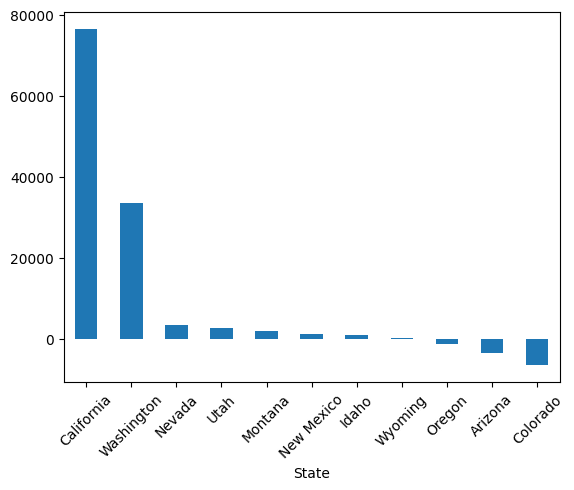

In [34]:
# Com o pandas
df.groupby("State")['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar', rot = 45)

E com matplotlib?

In [35]:
df_grouped = df.groupby("State")['Profit'].sum().sort_values(ascending = False)

In [36]:
x = list(df_grouped.index)
y = df_grouped.values

<BarContainer object of 11 artists>

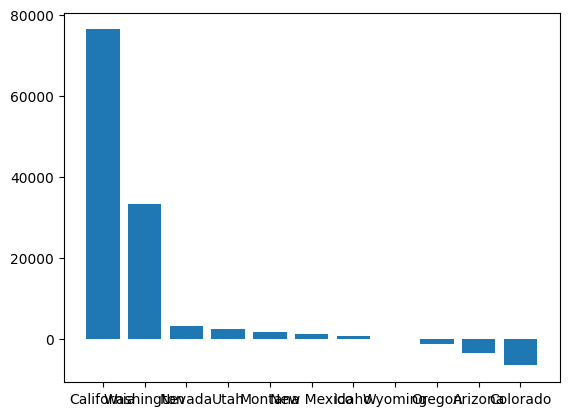

In [37]:
plt.bar(x,y,width = 0.8)

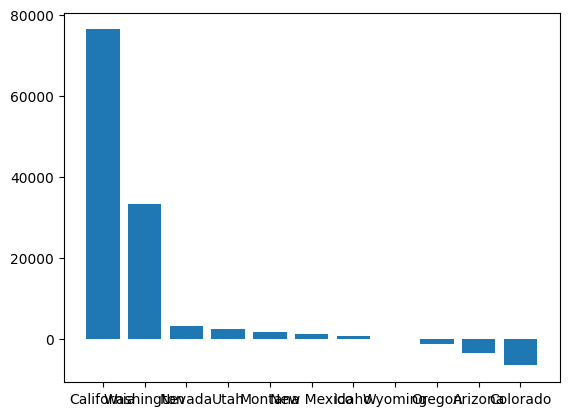

In [38]:
bars = plt.bar(x,y,width = 0.8)

In [39]:
bars

<BarContainer object of 11 artists>

Vamos colocar os rótulos nas barras?

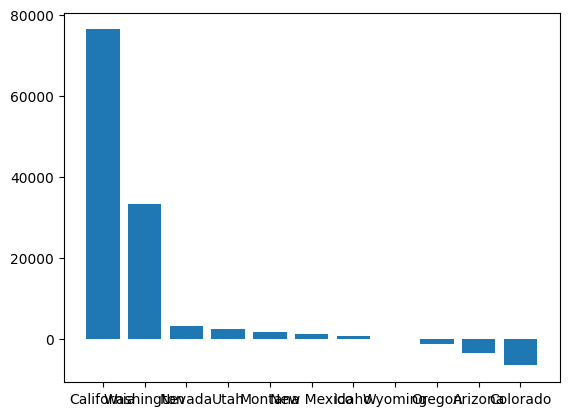

In [40]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y)
ax = fig.get_axes()

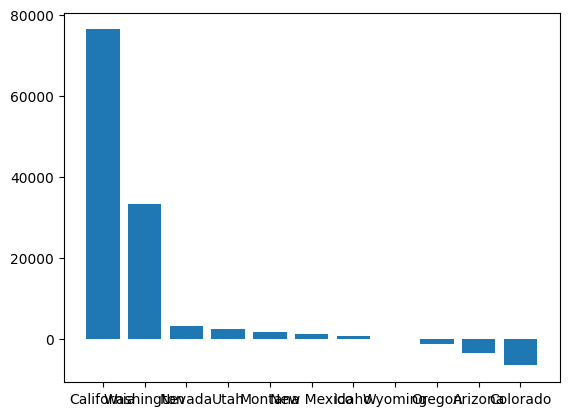

In [41]:
fig

In [42]:
ax

[<Axes: >]

[Axes.bar_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html)

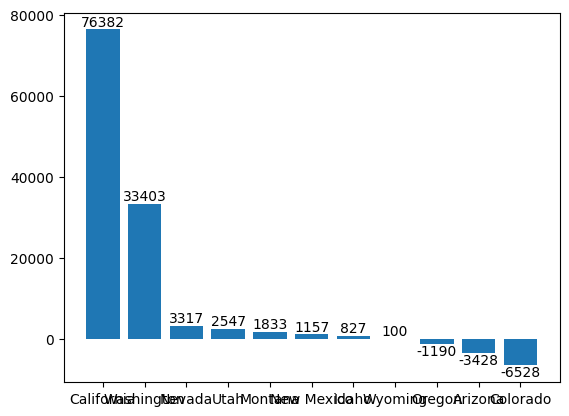

In [43]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f');

In [44]:
bars.datavalues

array([76381.6 , 33402.7 ,  3316.76,  2546.56,  1833.32,  1157.13,
         826.73,   100.2 , -1190.48, -3427.87, -6527.86])

C:\Users\Profº Fernando\AppData\Local\Temp\ipykernel_8728\1924283698.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = x, rotation = 45);


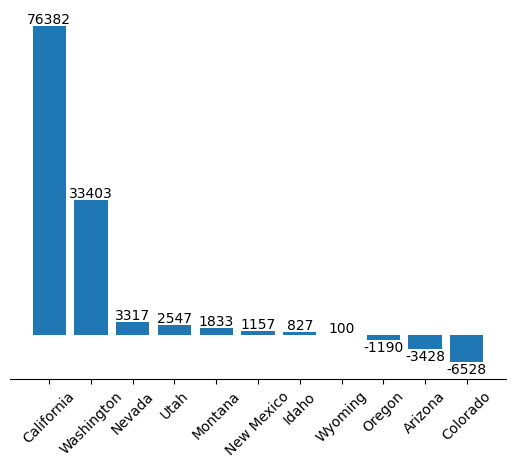

In [45]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].get_yaxis().set_visible(False)

ax[0].set_xticklabels(labels = x, rotation = 45);

E se quiséssemos fazer o mesmo tipo de visão, mas uma por ano, na mesma figura?

Vamos, primeiro, pensar com "dados fictícios"

# Voltamos às 20h40

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

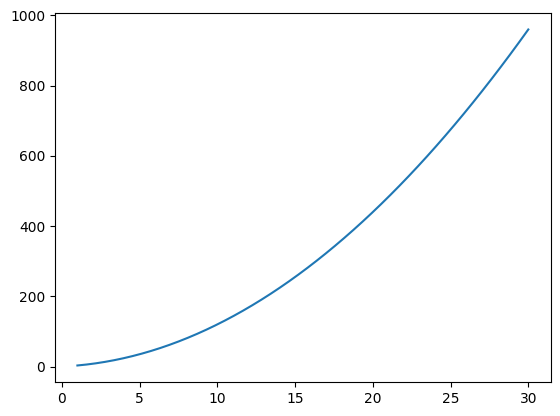

In [47]:
x = np.linspace(1,30,50)
y = 2*x + x**2
plt.plot(x,y)

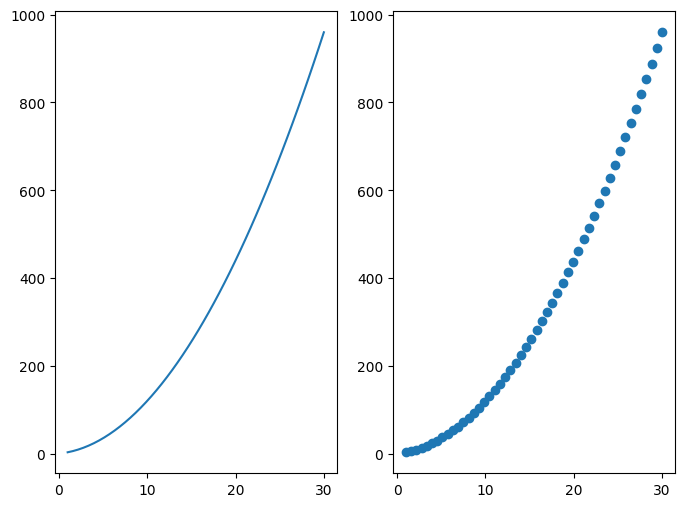

In [48]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,6))

#primeiro plot
ax[0].plot(x,y)
ax[1].scatter(x,y)

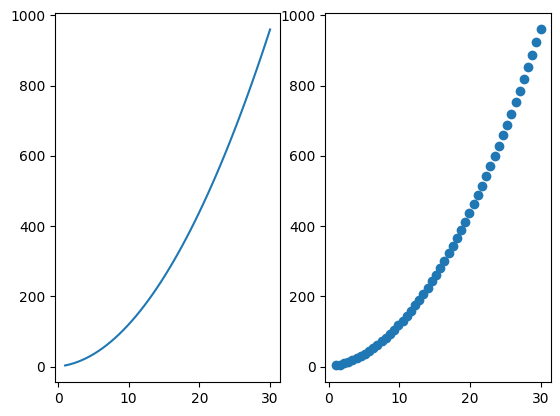

In [49]:
#figura 
plt.subplot(1,2,1)
plt.plot(x,y)

plt.subplot(1,2,2)
plt.scatter(x,y)

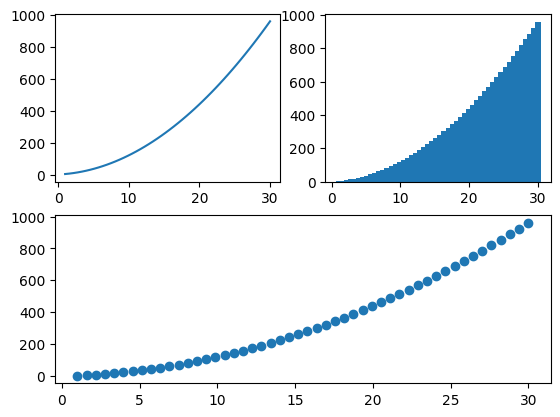

In [57]:


plt.subplot(2,2,1)  #dividindo em 2 linhas e 2 colunas a 1 posição
plt.plot(x,y)

plt.subplot(2,2,2)  #dividindo em 2 linhas e 2 colunas a 2 posição
plt.bar(x,y)

plt.subplot(2,1,2)  #dividindo em 2 linhas e 1 colunas a 2 posição
plt.scatter(x,y)

Voltando ao nosso conjunto de dados...

In [52]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


In [53]:
df['date'].min(), df['date'].max()

(Timestamp('2011-01-02 00:00:00'), Timestamp('2014-12-31 00:00:00'))

C:\Users\Profº Fernando\AppData\Local\Temp\ipykernel_8728\3690037768.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
C:\Users\Profº Fernando\AppData\Local\Temp\ipykernel_8728\3690037768.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
C:\Users\Profº Fernando\AppData\Local\Temp\ipykernel_8728\3690037768.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
C:\Users\Profº Fernando\AppData\Local\Temp\ipykernel_8728\3690037768.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)


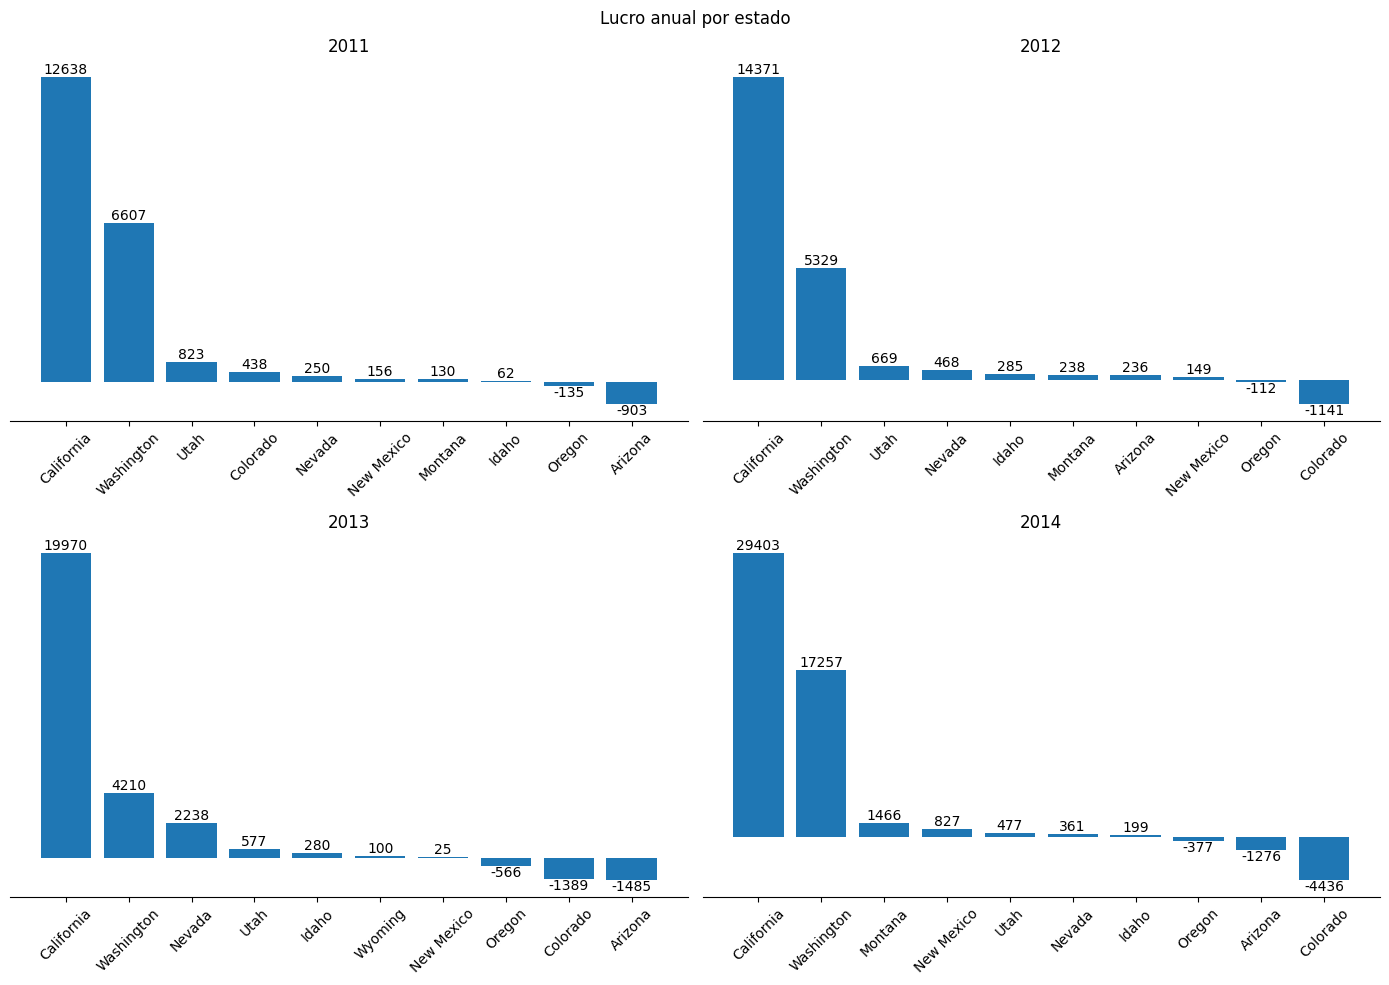

In [70]:
# Vamos dividir nossa figura em 4 gráficos (um por ano)
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
ax = np.reshape(ax, (1,4))

year = ['2011', '2012', '2013', '2014']

subplot_counter = 1
for i in range(0,4):
    plt.subplot(2,2,subplot_counter)
    
    # Para cada ano
    df_year = df[(df['date'] >= year[i]+'-01-01') & (df['date'] <= year[i]+'-12-31')]
    df_grouped = df_year.groupby("State")['Profit'].sum().sort_values(ascending = False)
    
    x = list(df_grouped.index)
    y = df_grouped.values
    
    bars = plt.bar(x,y)
    subplot_counter += 1
    
    plt.title(year[i])
    
    ax[0,i].bar_label(bars, fmt = '%.0f')

    ax[0,i].spines['right'].set_visible(False)
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['left'].set_visible(False)

    ax[0,i].get_yaxis().set_visible(False)

    ax[0,i].set_xticklabels(labels = x, rotation = 45)

plt.suptitle("Lucro anual por estado")
plt.tight_layout()

## Vamos, agora, "por a mão na massa"!

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

#### Total consolidado de postos para cada estado

#### Relação entre preço da gasolina e do etanol (nível Brasil)